In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

from tqdm import tqdm

import numpy as np
import pandas as pd
import re, os, sys

import seaborn as sns
sns.set_style('white')

import matplotlib.pyplot as plt
import matplotlib as mpl
import matplotlib.patches as mpatches
mpl.rcParams['pdf.fonttype'] = 42

import math

font_name = {'fontname':'Arial'}

plt.rcParams["font.family"] = "Arial"


In [2]:
# parameter settings

GPNotebook_dir = r"/Users/yingweihu/Documents/GitHub/GPNotebook"
data_name = "PDAC"

# working directory, wd
wd = os.path.join(GPNotebook_dir,"sample",data_name)
# input meta path: standardrized meta table
meta_path = os.path.join(wd,"meta/info.tsv")
# input expression matrix path
data_dir = os.path.join(wd,"data")
expr_path = os.path.join(data_dir,"PDA_JHU_GENCODEv34_nglycoform-peptide_matrix-abundances-MD_norm.tsv")

# print file location and verify the file path
print("Parameters")
print(f'--meta {meta_path}',
     os.path.exists(meta_path))
print(f'--expression {expr_path}',
     os.path.exists(expr_path))

Parameters
--meta /Users/yingweihu/Documents/GitHub/GPNotebook/sample/PDAC/meta/info.tsv True
--expression /Users/yingweihu/Documents/GitHub/GPNotebook/sample/PDAC/data/PDA_JHU_GENCODEv34_nglycoform-peptide_matrix-abundances-MD_norm.tsv True


In [3]:
# load meta data
meta_df = pd.read_csv(meta_path,sep="\t")
meta_df.head(10)

,Sample,CaseID,VitalStatus,SurvivalDays,Age,Gender,DeathCause
0,C3L-00102.N,C3L-00102,Deceased,249.0,42,Male,pancreatic carcinoma
1,C3L-00189.N,C3L-00189,Deceased,1035.0,68,Female,pancreatic carcinoma
2,C3L-00277.N,C3L-00277,Deceased,610.0,69,Male,pancreatic carcinoma
3,C3L-00401.N,C3L-00401,Living,1228.0,62,Female,Unknown
4,C3L-00640.N,C3L-00640,Living,594.0,59,Female,Unknown
5,C3L-00819.N,C3L-00819,Deceased,602.0,74,Male,pancreatic carcinoma
6,C3L-00881.N,C3L-00881,Living,3.0,80,Male,Unknown
7,C3L-00928.N,C3L-00928,Deceased,761.0,58,Female,pancreatic carcinoma
8,C3L-01031.N,C3L-01031,Living,369.0,64,Female,Unknown
9,C3L-01036.N,C3L-01036,Living,765.0,64,Male,Unknown


In [4]:
l = "Living"
d = "Deceased"
v = "VitalStatus"
c = "DeathCause"
s = "Sample"

dd = dict(meta_df[meta_df[v]==d].groupby(c).count()[s])
ld = dict(meta_df[meta_df[v]==l].groupby(c).count()[s])

In [5]:
ld

{'Unknown': 84}

In [6]:
dd

{'Unknown': 21,
 'complication due to medical/surgical care': 4,
 'other : ischemic stroke': 2,
 'other : mof- multiple organ failure': 1,
 'other: brain edema': 2,
 'other: cancerous cachexia': 2,
 'other: heart disorder': 1,
 'other: prostate carcinoma': 2,
 'pancreatic carcinoma': 73}

In [7]:
c1 = ('Deceased-PDAC',['pancreatic carcinoma'])
c2 = ('Deceased-Unknown',['Unknown'])
c3 = ('Deceased-Other',[i for i in dd.keys() if i not in c1[1] + c2[1]])

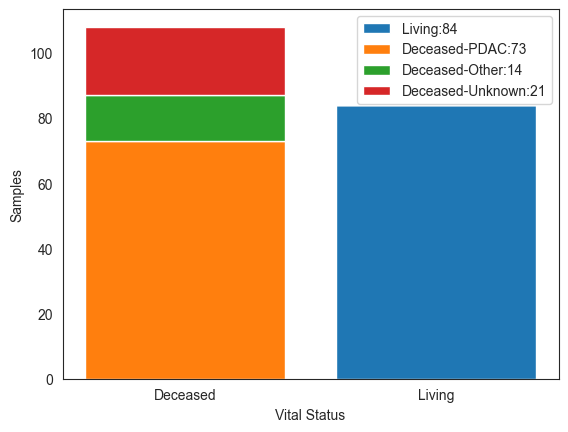

In [8]:
import matplotlib.pyplot as plt

ct1 = c1[0]
ct2 = c2[0]
ct3 = c3[0]

# Sample data
data = {
    l : [0,ld['Unknown']],
    ct1 : [sum([dd[i] for i in c1[1]]),0],
    ct3 : [sum([dd[i] for i in c3[1]]),0],
    ct2 : [sum([dd[i] for i in c2[1]]),0],
    
}
labels = [d, l]

# Create a figure and axis
fig, ax = plt.subplots()

# Create the stacked bar chart
ax.bar(
    labels, 
    data[l], 
    label=f'{l}:{data[l][1]}'
      )

ax.bar(
    labels, 
    data[ct1], 
    bottom=data[l], 
    label=f'{ct1}:{data[ct1][0]}'
    )

ax.bar(labels, 
       data[ct3], 
       bottom=np.array(data[l]) + np.array(data[ct1]) , 
       label=f'{ct3}:{data[ct3][0]}'
      )

ax.bar(labels, 
       data[ct2], 
       bottom=np.array(data[l]) + np.array(data[ct1]) + np.array(data[ct3]), 
       label=f'{ct2}:{data[ct2][0]}'
      )

# ax.bar(labels, data['Category C'], bottom=data['Category A']+data['Category B'], label='Category C')

# Add labels and legend
ax.set_xlabel('Vital Status')
ax.set_ylabel('Samples')
ax.legend()

# Show the chart
plt.show()
